# **Learning Rate**

- Learning Rate is crucial hyperparameter for train the Machine Learning modelsand particularly in optimization algorithm like Gradient Descent model.
- In Gradient Descent, the learning rate controls the step size to minimize the loss function.
- A high learning rate may led to unstability, while small learning rate slow down the convergence.
- In Deep Learning the learning rate is update the weights and bias of neural network layers during backpropagation.
- Adjusting the learning rate can help fine-tune the performance of model.
- Various learning rate techniques such as AdaGrad, RMSProp, Adam are adjust the learning rate during training for this it can improve the convergence speed, stability & performance of the model.

In [22]:
# Importing Libraries
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

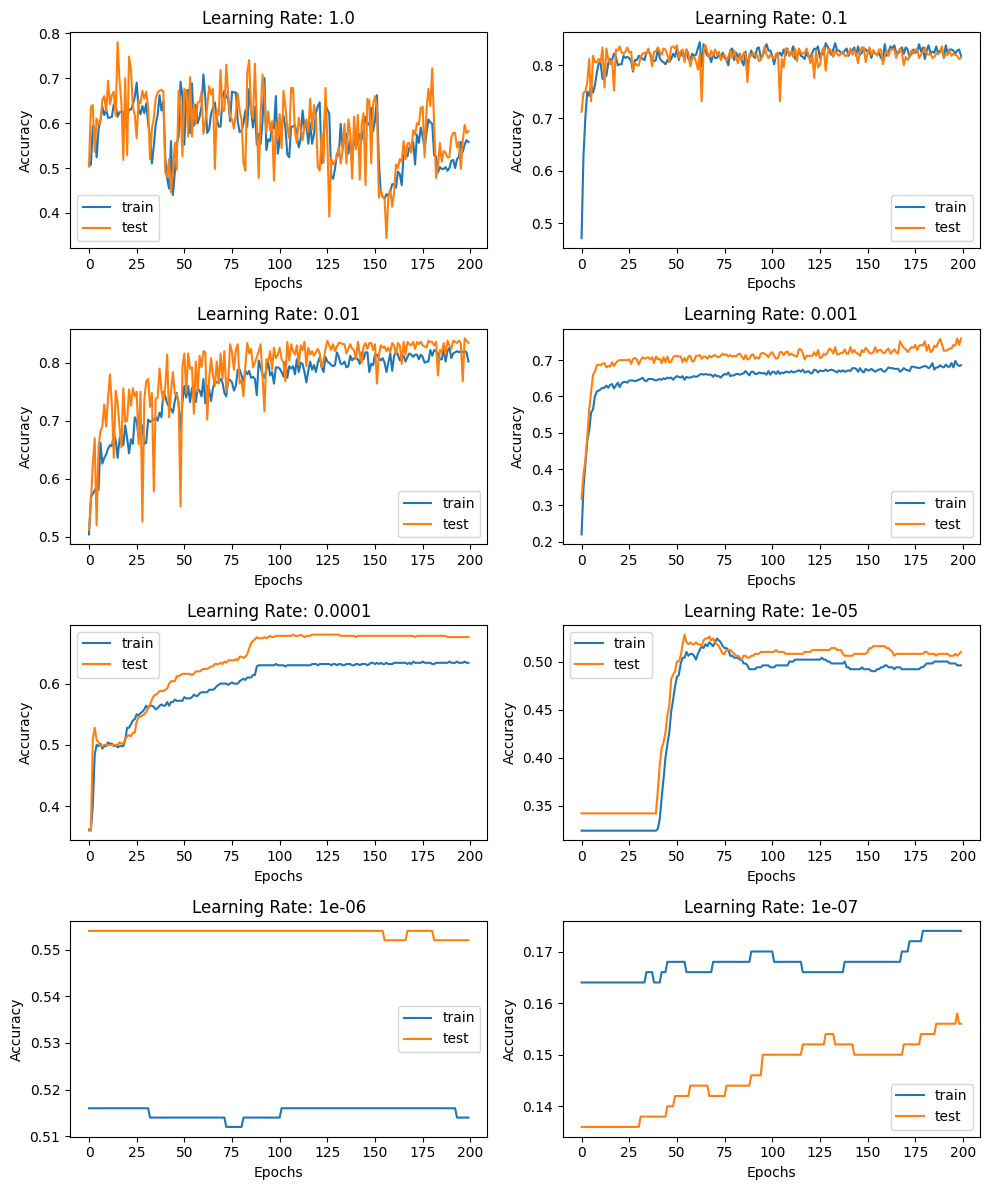

In [23]:
# Preparing the dataset for Training & Testing
def prepare_data():

    # Generating 2-D classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

    # One-Hot Encoding for output variable (y)
    y = to_categorical(y)

    # Observations
    n_train = 500

    # Splitting the data into Training & Testing
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# Fit the model into Training &Testing
def fit_model(trainX, trainy, testX, testy, lrate):

    # Defining the model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation="relu", kernel_initializer="he_uniform"))
    model.add(Dense(3, activation="softmax"))

    # Compiling the model
    opt = SGD(learning_rate=lrate)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # Fitting the model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

    # Plotting the Learning Curve
    pyplot.plot(history.history["accuracy"], label="train")
    pyplot.plot(history.history["val_accuracy"], label="test")
    pyplot.title("Learning Rate: " + str(lrate))
    pyplot.xlabel("Epochs")
    pyplot.ylabel("Accuracy")
    pyplot.legend()

# Preparing the Dataset
trainX, trainy, testX, testy = prepare_data()

# Creating Learning Curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

# Adjusting plot size
pyplot.figure(figsize=(10, 12))

for i in range(len(learning_rates)):

    # Determining the Plot Number
    plot_no = 420 + (i + 1)
    pyplot.subplot(plot_no)

    # Fitting the model and plotting a learning curve for learning rates
    fit_model(trainX, trainy, testX, testy, learning_rates[i])

# Displaying the Learning Curves
pyplot.tight_layout()
pyplot.show()


- From the above Learning Curves we can able to observe that the Learning Rate value with "0.1" gives the best results for this Neural Network Classification Model.
- By expereimenting with different learning rates we can able to get the best results.